In [1]:
%matplotlib widget

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


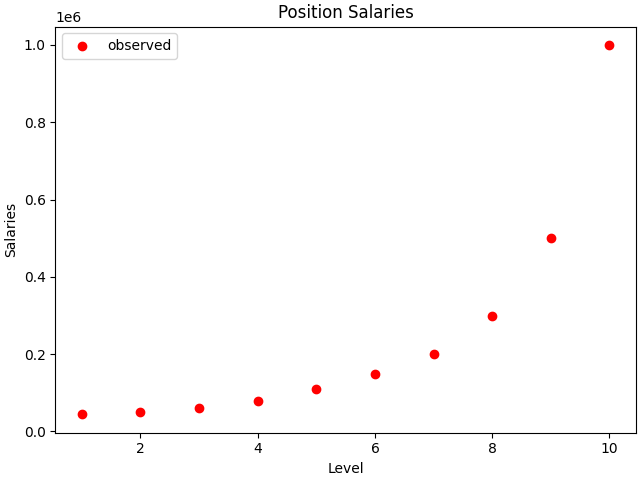

In [2]:
df = pd.read_csv('position_salaries.csv', header=0) #read csv
print(df) # show csv data frame

position = df.values[:,0].astype(str) 
level = df.values[:,1].astype(np.float64)
salaries = df.values[:,2].astype(np.float64)

fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

This are the actual salaries corresponding to position levels. It definitely doesn't look linear. Let's try to use a line to fit it anyways.

In [3]:
x = level.reshape((-1,1))
y = salaries

reg = LinearRegression().fit(x, y) # use linear regression from scikit
prediction = reg.predict(x)

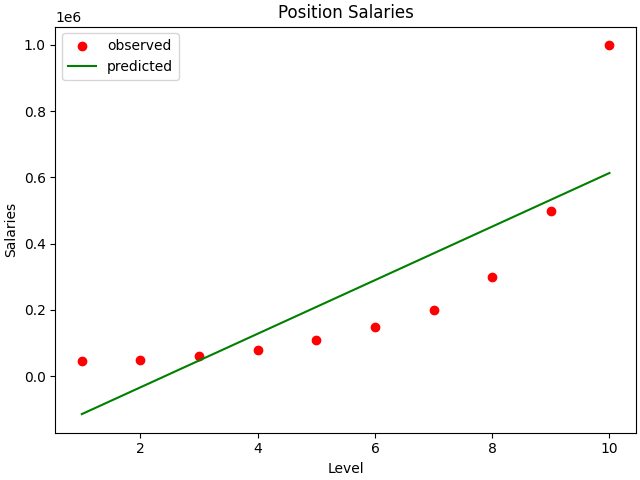

In [4]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.plot(level, prediction, c="g", label="predicted")

ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

Here, this is the best prediction that scikit has come up with. The line of best fit is bad so we would prefer using a polynomial regression instead.

Normally, it would be hard to create a general polynomial regression model since we have to derive the cost function from scratch and find partial derivatives of the cost function to update all the features independently. However, this is where feature engineering comes. Instead of creating a new cost function, we can just add more features that are squared versions of the original features. These new squared features will help the linear model to fit the data better. 

In [5]:
x2 = x**2 # square all features
x2 = np.hstack([x,x2])
print(x2) # show squared features

[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]


In [6]:
reg = LinearRegression().fit(x2, y) # use linear regression from scikit
prediction = reg.predict(x2)

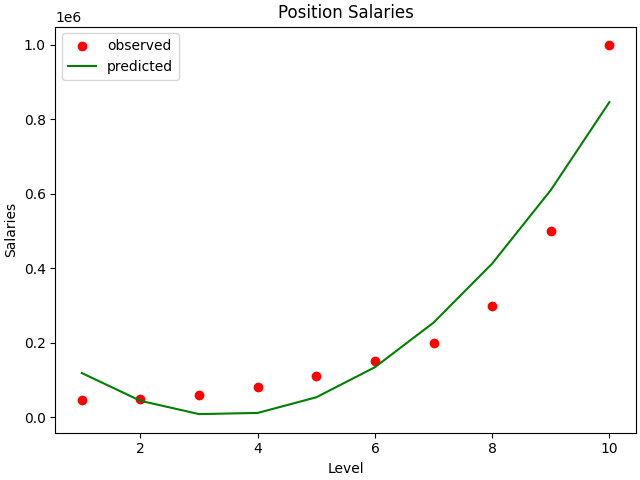

In [7]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.plot(level, prediction, c="g", label="predicted")

ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

Now the scikit model fits a better curve to the data. All of this is possible with just adding new x squared features to the input. Moreover, we are still using linear regression from scikit to predict the dataset. This clearly saves so much time as we can manually create new features where we think would produce a better fit to the dataset. And we get to avoid changing the regression model at all.

Let's try adding x^3 feature to see how it looks

In [8]:
x3 = x**3 # cube all features
x3 = np.hstack([x2,x3])
print(x3) # show cubed features

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]
 [   6.   36.  216.]
 [   7.   49.  343.]
 [   8.   64.  512.]
 [   9.   81.  729.]
 [  10.  100. 1000.]]


In [9]:
reg = LinearRegression().fit(x3, y) # use linear regression from scikit
prediction = reg.predict(x3)

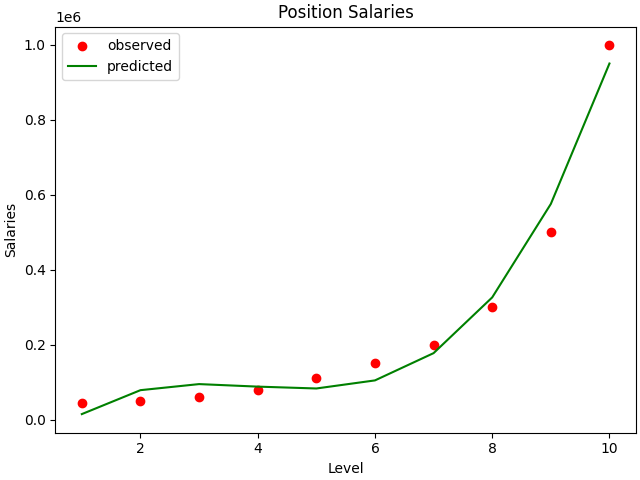

In [10]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.plot(level, prediction, c="g", label="predicted")

ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

Now with squared and cubed features we get an even better fit. 
Next, let's go much deeper and go to x^11 features.

In [11]:
xg = np.array(x)
for i in range(2, 12):
    xi = x**i # cube all features
    xg = np.hstack([xg,xi])
print(xg.shape)
print(xg) # show new features scaled up to x^11

(10, 11)
[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.00000000e+00 4.00000000e+00 8.00000000e+00 1.60000000e+01
  3.20000000e+01 6.40000000e+01 1.28000000e+02 2.56000000e+02
  5.12000000e+02 1.02400000e+03 2.04800000e+03]
 [3.00000000e+00 9.00000000e+00 2.70000000e+01 8.10000000e+01
  2.43000000e+02 7.29000000e+02 2.18700000e+03 6.56100000e+03
  1.96830000e+04 5.90490000e+04 1.77147000e+05]
 [4.00000000e+00 1.60000000e+01 6.40000000e+01 2.56000000e+02
  1.02400000e+03 4.09600000e+03 1.63840000e+04 6.55360000e+04
  2.62144000e+05 1.04857600e+06 4.19430400e+06]
 [5.00000000e+00 2.50000000e+01 1.25000000e+02 6.25000000e+02
  3.12500000e+03 1.56250000e+04 7.81250000e+04 3.90625000e+05
  1.95312500e+06 9.76562500e+06 4.88281250e+07]
 [6.00000000e+00 3.60000000e+01 2.16000000e+02 1.29600000e+03
  7.77600000e+03 4.66560000e+04 2.79936000e+05 1.67961600e+06
  1.007

This is a lot of new features. We have a higher order polynomial up to x^11. Let's see how scikit fits the data with these new features.

In [12]:
reg = LinearRegression().fit(xg, y) # use linear regression from scikit
prediction = reg.predict(xg)

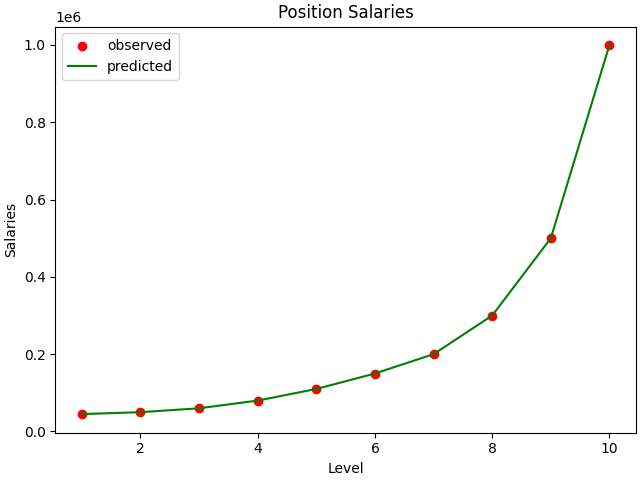

In [13]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.plot(level, prediction, c="g", label="predicted")

ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

Voila, now the predictions are basically on the spot. Now Let's graph this function over a wider range and see how it looks.

In [14]:
w = reg.coef_.reshape((-1,1))
b = reg.intercept_

print("w:", w)
print("b:", b)

w: [[ 1.28299493e+04]
 [ 1.07175360e+04]
 [-6.00987687e+03]
 [-1.11726716e+04]
 [ 1.29881433e+04]
 [-6.00943706e+03]
 [ 1.54575503e+03]
 [-2.38385605e+02]
 [ 2.19203423e+01]
 [-1.10820184e+00]
 [ 2.37081528e-02]]
b: 30328.187158545334


In [15]:
xrange = np.linspace(-3, 12, 200) # bunch of x values to visualize the function
xmat = np.array([xrange]).reshape((-1,1)) # create 2d array with 1 feature
xnew = np.array([xrange]).reshape((-1,1)) # for multiple features with evaluated polynomials

for i in range(2, 12):
    xi = xmat**i # cube all features
    xnew = np.hstack([xnew, xi])
print(xnew) # show new x values

[[-3.00000000e+00  9.00000000e+00 -2.70000000e+01 ... -1.96830000e+04
   5.90490000e+04 -1.77147000e+05]
 [-2.92462312e+00  8.55342037e+00 -2.50155309e+01 ... -1.56541386e+04
   4.57824555e+04 -1.33896428e+05]
 [-2.84924623e+00  8.11820409e+00 -2.31307624e+01 ... -1.23757020e+04
   3.52614222e+04 -1.00468474e+05]
 ...
 [ 1.18492462e+01  1.40404636e+02  1.66368911e+03 ...  4.60486093e+09
   5.45641311e+10  6.46543824e+11]
 [ 1.19246231e+01  1.42196636e+02  1.69564130e+03 ...  4.87530686e+09
   5.81361969e+10  6.93252237e+11]
 [ 1.20000000e+01  1.44000000e+02  1.72800000e+03 ...  5.15978035e+09
   6.19173642e+10  7.43008371e+11]]


In [16]:
predict = np.matmul(xnew, w) + b
predict = predict.reshape(-1)
print(predict) # show all predictions on the range

[-1.36371323e+07 -1.16242066e+07 -9.87527841e+06 -8.35988981e+06
 -7.05063434e+06 -5.92289540e+06 -4.95460364e+06 -4.12601189e+06
 -3.41948686e+06 -2.81931640e+06 -2.31153148e+06 -1.88374190e+06
 -1.52498499e+06 -1.22558626e+06 -9.77031511e+05 -7.71849339e+05
 -6.03503615e+05 -4.66295086e+05 -3.55271539e+05 -2.66145923e+05
 -1.95221846e+05 -1.39325929e+05 -9.57464999e+04 -6.21781558e+04
 -3.66717468e+04 -1.75893547e+04 -3.56387270e+03  6.53718761e+03
  1.36440115e+04  1.85132460e+04  2.17535205e+04  2.38480104e+04
  2.51743085e+04  2.60218565e+04  2.66071643e+04  2.70870345e+04
  2.75699912e+04  2.81260960e+04  2.87953238e+04  2.95946532e+04
  3.05240181e+04  3.15712518e+04  3.27161454e+04  3.39337317e+04
  3.51968952e+04  3.64784001e+04  3.77524198e+04  3.89956416e+04
  4.01880154e+04  4.13132053e+04  4.23587982e+04  4.33163174e+04
  4.41810821e+04  4.49519495e+04  4.56309726e+04  4.62229992e+04
  4.67352365e+04  4.71768010e+04  4.75582691e+04  4.78912432e+04
  4.81879422e+04  4.84608

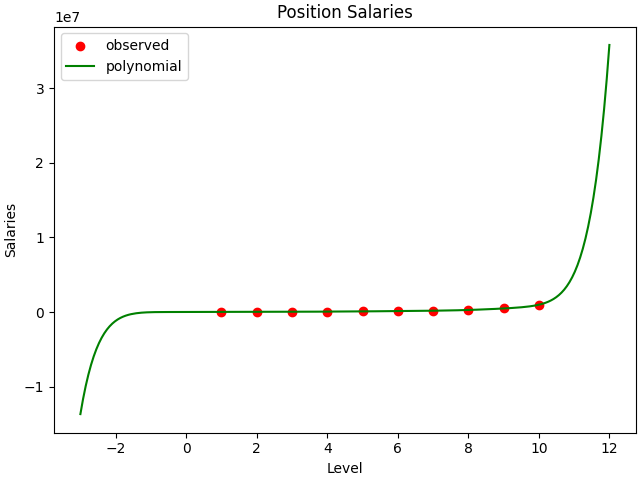

In [17]:
fig, ax = plt.subplots(layout="constrained")
ax.scatter(level, salaries, c="r", label="observed")
ax.plot(xrange, predict, c="g", label="polynomial")

ax.set_xlabel("Level")
ax.set_ylabel("Salaries")
ax.set_title("Position Salaries")
ax.legend()

When we graph the actual function we use to predict the dataset, we can see that the complex polynomial function drastically shoots down left and shoots up right. This is because polynomials are very precise and small chances in x values can lead to drastic explosions of y values. This means that the even though the polynomial works for this dataset, it likely won't work if the new data is outside of the range of this dataset. Therefore, any new data we predict must be inside of dataset range. If there's any chance of new data being outside of the range, then it's better to reduce the degree (complexity) of the polynomial.